## Topic 3: Matplotlib for Univariate Data Visualization in Python

This tutorial includes the following methods and operations:
- Data Checking and Cleaning
- Data Mining / Inferential Data Analysis
- Predictive Modeling


In [2]:
import os                           
import numpy as np  # arrays and matrix math
import pandas as pd #for tabular data
import matplotlib.pyplot as plt# plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)#controlling of axes ticks
plt.rc('axes', axisbelow=True)# setting axes and grids in the background for all plots
from matplotlib.patches import Rectangle # drawing shapes on plots

### Loading The Dataset

In [3]:
# reading data from github
table = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/spatial_nonlinear_MV_facies_v1.csv')
# removing the first feature (column)
table = table.iloc[:, 1:]
print('The tabular data is a ' + str(type(table)))
table.head(n=3)

The tabular data is a <class 'pandas.core.frame.DataFrame'>


,Y,Porosity,Perm,AI,Facies
0,10.006391,7.791849,332.802662,4114.121592,1
1,160.265186,16.708829,505.072608,3820.596087,1
2,775.834642,12.430224,404.367985,4180.556194,1


### Extracting the Feature from the Table

In [4]:
# extracting porosity feature a a 1D ndarray
por = table['Porosity'].values
print('The por is a ' + str(type(por)) + ' of shape ' + str(por.shape) + '.')

The por is a <class 'numpy.ndarray'> of shape (457,).


### Plotting Histograms


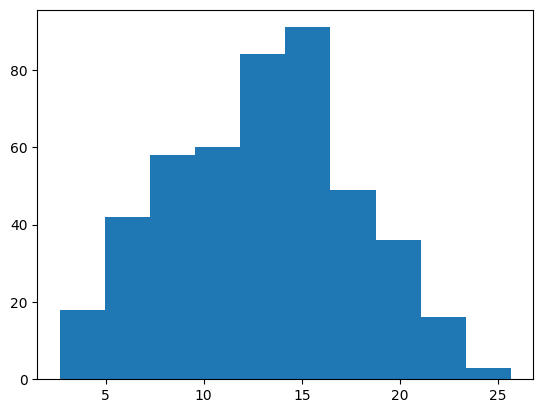

In [5]:
plt.hist(x=table['Porosity'].values)
plt.show()

#### Designing The Plot Space

Now we improve the plot by considering and designing the plot space.
- Label the axes (.xlabel(),.ylabel()).
- Adding a grid (.grid()) to improve our ability to perform 'ocular inspection'.
- We explicity control the plot size, start considering readability.
- Also we consider color (color = string) to separate elements, i.e. foreground and background.

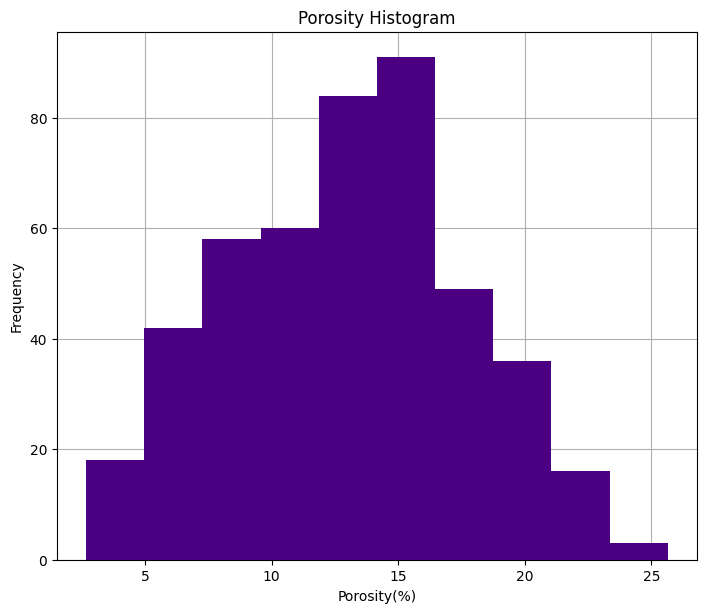

In [6]:
plt.hist(x=por, color = 'indigo')

#naming the axes and histogram
plt.xlabel('Porosity(%)')
plt.ylabel('Frequency')
plt.title('Porosity Histogram')
plt.grid() # adding grid
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1) # setting the plot size
plt.show()

### Composing The Elements

> Combining elements to improve clarity.

- Outline the histogram bars (edgecolor = string) to separate the binning of the data.
- Use transparency (alpha < 1.0) to further improve 'ocular inspection'.

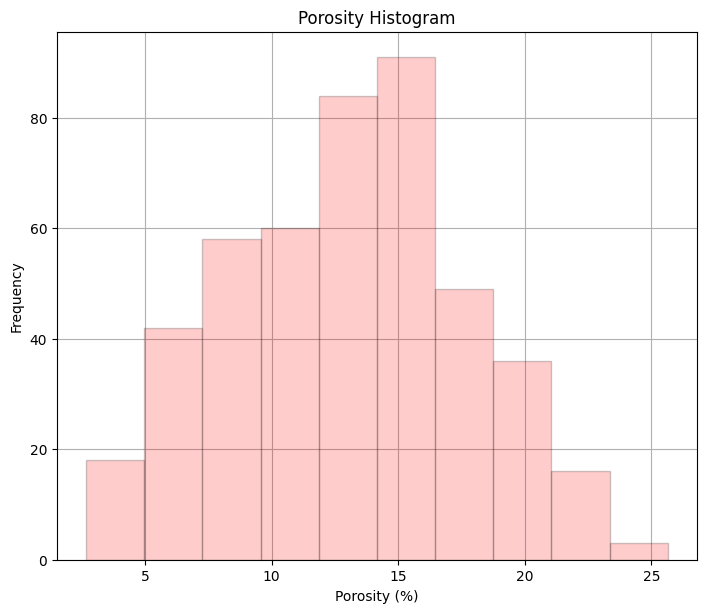

In [7]:
plt.hist(alpha=0.2, edgecolor='black', x=por, color='red')
plt.xlabel('Porosity (%)')
plt.ylabel('Frequency')
plt.title('Porosity Histogram')  # axes labels
plt.grid()# adding grid
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1)
plt.show()

#### Improving Consistency Between Elements
- Specify the axes extents (.xlim(),.ylim()) and align yaxes increments with integer frequency.
- Only show grid on y and add a minor grid and ticks for readibility.

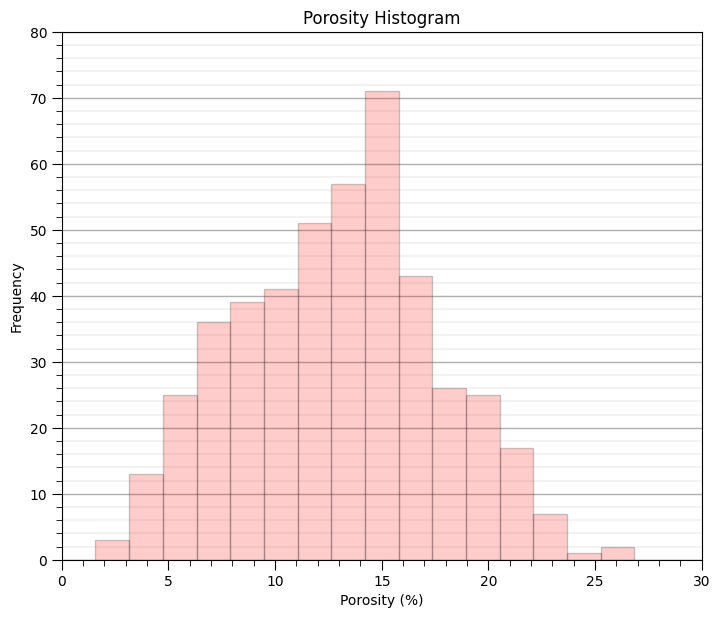

In [8]:
plt.hist(bins=np.linspace(0, 30, 20), alpha=0.2, edgecolor='black', x=por, color='red')
plt.xlabel('Porosity (%)')
plt.ylabel('Frequency')
plt.title('Porosity Histogram')  # axes labels
plt.xlim(0, 30)
plt.ylim(0, 80) #making constraint the axes extents
plt.gca().yaxis.grid(True, which='major', linewidth=1.0)
plt.gca().yaxis.grid(True, which='minor', linewidth=0.2)  # add y and x grids
plt.gca().tick_params(which='major', length=7)
plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())  # turning on minor ticks
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1)
plt.show() # setting plot size

#### Histogram Ultimate Control

> Improving the consistency between our plot elements and adding hierarchy to the labels.
- Specify the histogram bins (bins = list), grid and ticks to align with histogram bins and adjust the font sizes (fontsize = float).

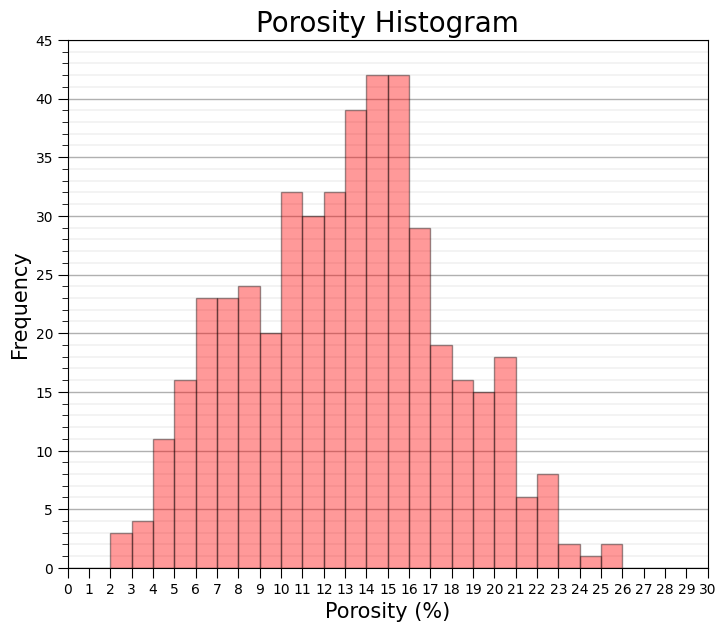

In [9]:
plt.hist(bins=np.linspace(0, 30, 31), alpha=0.4, edgecolor='black', x=por, color='red')
plt.gca().tick_params(which='major', length=7)
plt.gca().tick_params(which='minor', length=4)
plt.gca().yaxis.grid(True, which='major', linewidth=1.0)
plt.gca().yaxis.grid(True, which='minor', linewidth=0.2)# adding y grid
plt.xlabel('Porosity (%)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Porosity Histogram', fontsize=20)# axes labels
plt.xlim(0, 30)
plt.ylim(0, 45)#making constraint about the axes's extents

# setting the major ticks aligned with the bins
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
# setting the minor ticks for integer frequency
plt.gca().yaxis.set_major_locator(MultipleLocator(5))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1)
plt.show() # setting plot size

### Making a Custom Plot Formatting Function

> We could make our function more flexible with the addition of function arguments. This is helpful for concise workflows, especially if similar plots are reused.

In [10]:
def format_hist(): #declaring function
    plt.xlabel('Porosity (%)', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.title('Porosity Histogram', fontsize=20)  # axes labels
    plt.xlim(0, 30)
    plt.ylim(0, 45)# constrain the value of axis
    plt.gca().yaxis.grid(True, which='major', linewidth=1.0)  # adding y major grid
    plt.gca().yaxis.grid(True, which='minor', linewidth=0.2)  # adding y minor grid
    plt.gca().tick_params(which='major', length=7)
    plt.gca().tick_params(which='minor', length=4)
    
    # setting the major ticks aligned with the bins
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))
    
    # set the minor ticks for integer frequency
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    
    # set the minor ticks for integer frequency
    plt.gca().yaxis.set_major_locator(MultipleLocator(5))

#### Histogram with Custom Formatting Function

> Above result with much less code.

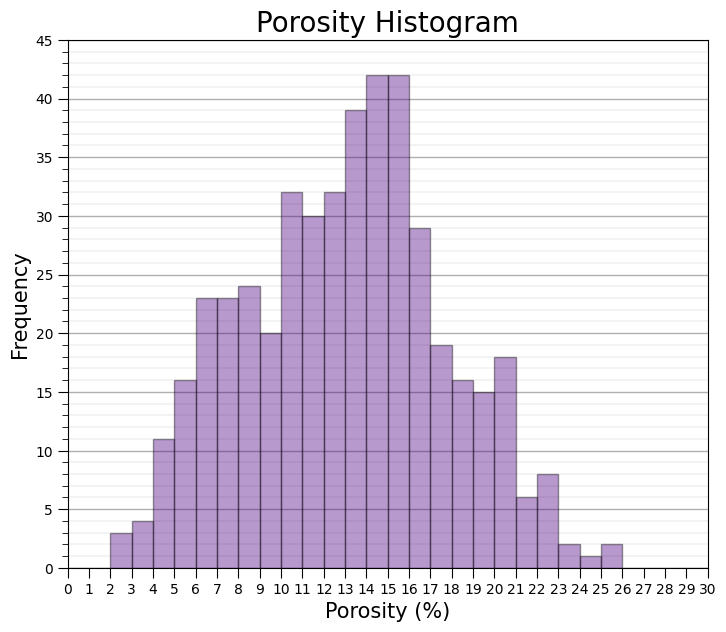

In [11]:
plt.hist(bins=np.linspace(0, 30, 31), alpha=0.4, edgecolor='black', x=por, color='indigo')

# inserting the custom plot formatting
format_hist()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1)
plt.show() #setting plot size

#### Adding A Custom Legend

> We may want to communicate key statistics with a custom legend by adding shapes and annotation to our plot.

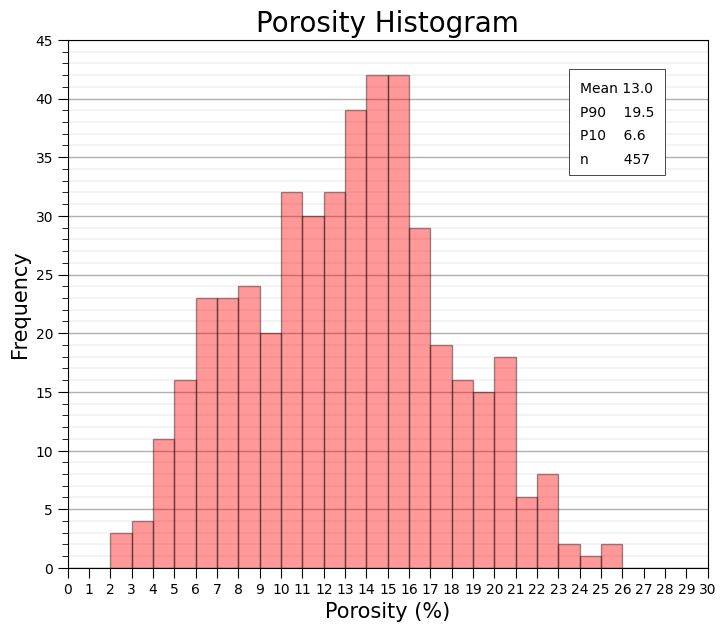

In [12]:
plt.hist(bins=np.linspace(0, 30, 31), alpha=0.4, edgecolor='black', x=por, color='red')

# insert the custom plot formatting
format_hist()
plt.gca().add_patch(Rectangle((23.5, 33.5), 4.5, 9, facecolor='white', edgecolor='black', linewidth=0.5))

plt.text(24, 40.5, 'Mean ' + str(round(np.average(por), 1)))
plt.text(24, 38.5, 'P90    ' + str(round(np.percentile(por, 90), 1)))
plt.text(24, 36.5, 'P10    ' + str(round(np.percentile(por, 10), 1)))
plt.text(24, 34.5, 'n        ' + str(por.shape[0]))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1)

plt.show()  # setting plot size

#### Highlighting Data Features


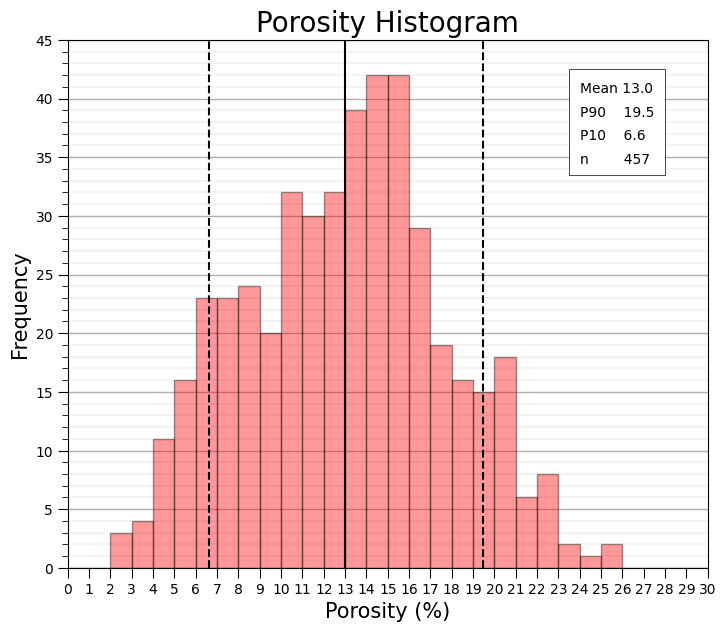

In [13]:
plt.hist(bins=np.linspace(0, 30, 31), alpha=0.4, edgecolor='black', x=por, color='red')
# insert the custom plot formatting
format_hist()

plt.gca().add_patch(Rectangle((23.5, 33.5), 4.5, 9, facecolor='white', edgecolor='black', linewidth=0.5))
plt.text(24, 40.5, 'Mean ' + str(round(np.average(por), 1)))
plt.text(24, 38.5, 'P90    ' + str(round(np.percentile(por, 90), 1)))
plt.text(24, 36.5, 'P10    ' + str(round(np.percentile(por, 10), 1)))
plt.text(24, 34.5, 'n        ' + str(por.shape[0]))
p10 = np.percentile(por, 10)
avg = np.average(por)
p90 = np.percentile(por, 90)
plt.plot([p10, p10], [0.0, 45], color='black', linestyle='dashed')
plt.plot([avg, avg], [0.0, 45], color='black')
plt.plot([p90, p90], [0.0, 45], color='black', linestyle='dashed')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1)
plt.show() # setting plot size

### Comparison From Start To End


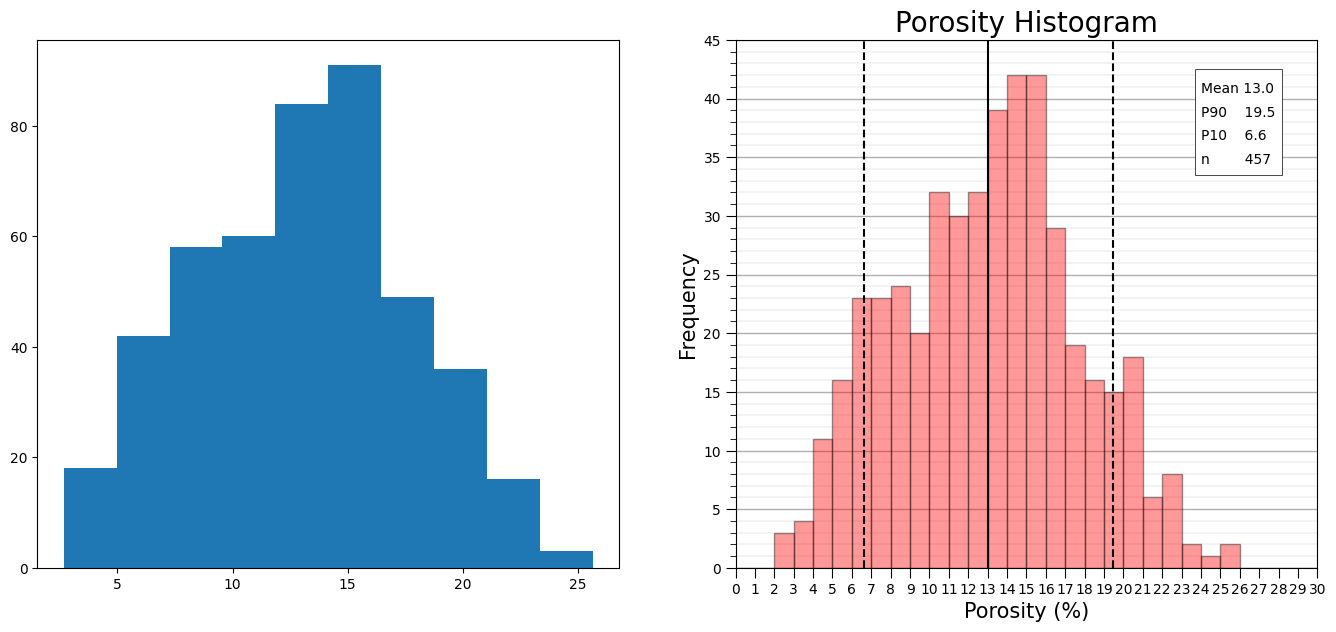

In [14]:
plt.subplot(121)
plt.hist(por)

plt.subplot(122)
plt.hist(bins=np.linspace(0, 30, 31), alpha=0.4, edgecolor='black', x=por, color='red')
# inserting the custom plot formatting
format_hist()

plt.gca().add_patch(Rectangle((23.7, 33.5), 4.5, 9, facecolor='white', edgecolor='black', linewidth=0.5))
plt.text(24, 40.5, 'Mean ' + str(round(np.average(por), 1)))
plt.text(24, 38.5, 'P90    ' + str(round(np.percentile(por, 90), 1)))
plt.text(24, 36.5, 'P10    ' + str(round(np.percentile(por, 10), 1)))
plt.text(24, 34.5, 'n        ' + str(por.shape[0]))
p10 = np.percentile(por, 10)
avg = np.average(por)
p90 = np.percentile(por, 90)
plt.plot([p10, p10], [0.0, 45], color='black', linestyle='dashed')
plt.plot([avg, avg], [0.0, 45], color='black')
plt.plot([p90, p90], [0.0, 45], color='black', linestyle='dashed')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1)
plt.show()  # setting plot size

### Multiple Plots

> Separating the samples by facies.

- Facies 0 - shalestone
- Facies 1 - sandstone

In [15]:
# extracting sandstone samples
sand = table[table['Facies'] == 1]['Porosity'].values

# extractting shalestone samples
shale = table[table['Facies'] == 0]['Porosity'].values

print('There are ' + str(len(sand)) + ' sandstone samples.')
print('There are ' + str(len(shale)) + ' shalestone samples.')

There are 360 sandstone samples.
There are 97 shalestone samples.
